<a href="https://colab.research.google.com/github/Chanzwastaken/data-science-salaries/blob/main/ds_salaries_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary file
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('ds_salaries.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [ ]:
#replace the data into integer
data.replace({
    'employment_type': {'FT': 0, 'CT': 1, 'PT': 2, 'FL': 3},
    'experience_level': {'MI': 0, 'SE': 1, 'EN': 2, 'EX': 3},
    'job_title': dict(zip(job_titles, range(len(job_titles)))),
    'employee_residence': dict(zip(employee_residence, range(len(employee_residence)))),
    'company_location': dict(zip(company_location, range(len(company_location)))),
    'company_size': {'S': 0, 'M': 1, 'L': 2},
    'salary_currency': dict(zip(salary_currency, range(len(salary_currency))))
}, inplace=True)

#change the datatype
data = data.astype({
    'employment_type': int,
    'experience_level': int,
    'job_title': int,
    'employee_residence': int,
    'company_location': int,
    'company_size': int,
    'salary_currency': int
})

In [ ]:
print(data)

     Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0             0       2020                 0                0          0   
1             1       2020                 1                0          1   
2             2       2020                 1                0          2   
3             3       2020                 0                0          3   
4             4       2020                 1                0          4   
..          ...        ...               ...              ...        ...   
602         602       2022                 1                0         10   
603         603       2022                 1                0         10   
604         604       2022                 1                0          5   
605         605       2022                 1                0          5   
606         606       2022                 0                0         19   

     salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0     

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None


In [ ]:
#min
min = data['salary_in_usd'].min()

#max
max = data['salary_in_usd'].max()

#mean
mean = data['salary_in_usd'].mean()

#median
median = data['salary_in_usd'].median()

#mode
mode= data['salary_in_usd'].mode()

#standard deviation
std_dev = data['salary_in_usd'].std()

# Print the results
print("Min: ", min)
print("Max: ", max)
print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)
print("Standard Deviation: ", std_dev)


Min:  2859
Max:  600000
Mean:  112297.86985172982
Median:  101570.0
Mode:  0    100000
Name: salary_in_usd, dtype: int64
Standard Deviation:  70957.25941139569


In [ ]:
# Calculating the IQR
quartiles = data['salary_in_usd'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

87274.0


In [ ]:
#check the coocurence
corr_matrix = data.corr()
corr_matrix


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,1.000000,0.886550,-0.031257,-0.088177,-0.007625,-0.096250,-0.048459,0.167025,-0.042086,0.095000,-0.041351,0.446386
work_year,0.886550,1.000000,-0.018915,-0.099177,0.024699,-0.087577,-0.057663,0.170493,-0.091532,0.076314,-0.080577,0.474206
experience_level,-0.031257,-0.018915,1.000000,0.036514,0.124363,-0.043905,-0.080286,0.150924,-0.026874,0.091606,0.023335,0.014408
employment_type,-0.088177,-0.099177,0.036514,1.000000,0.038479,-0.026033,-0.023089,-0.128689,0.138633,0.002909,0.053846,-0.004056
job_title,-0.007625,0.024699,0.124363,0.038479,1.000000,-0.006517,-0.010275,0.192384,0.063737,0.083397,0.019112,-0.052510
salary,-0.096250,-0.087577,-0.043905,-0.026033,-0.006517,1.000000,0.250843,-0.083906,0.041620,-0.014608,0.069363,-0.131269
salary_currency,-0.048459,-0.057663,-0.080286,-0.023089,-0.010275,0.250843,1.000000,-0.189925,0.321633,-0.079285,0.414851,-0.112852
salary_in_usd,0.167025,0.170493,0.150924,-0.128689,0.192384,-0.083906,-0.189925,1.000000,-0.296370,0.132122,-0.309007,0.003260
employee_residence,-0.042086,-0.091532,-0.026874,0.138633,0.063737,0.041620,0.321633,-0.296370,1.000000,0.011113,0.767433,-0.093667
remote_ratio,0.095000,0.076314,0.091606,0.002909,0.083397,-0.014608,-0.079285,0.132122,0.011113,1.000000,-0.017757,0.043503


In [ ]:
print(data['salary_in_usd'].corr(data['work_year']))

0.17049332455332777


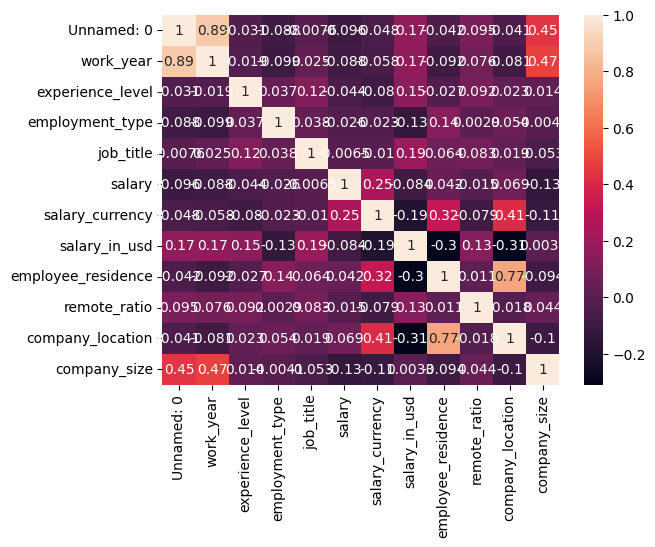

In [ ]:
#visualize it in heatmap using seaborn
import seaborn as sn
sn.heatmap(corr_matrix, annot=True)
plt.show()


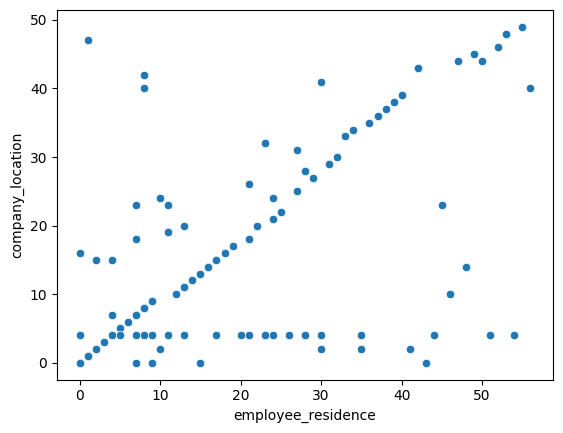

In [ ]:
#visualize 'company_location' and 'employee_residence' in scatterplot using seaborn
sn.scatterplot(x="employee_residence", y="company_location", data=data);

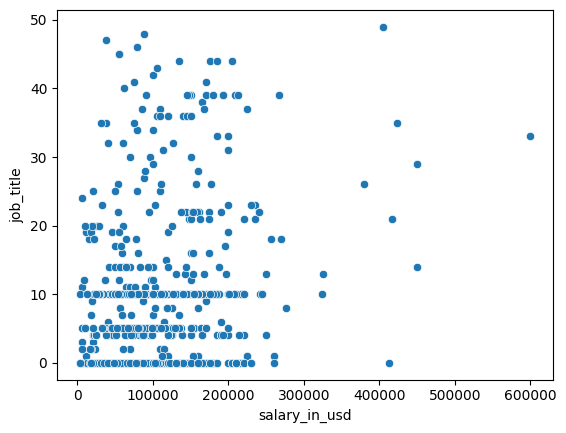

In [ ]:
#visualize 'salary_in_usd' and 'job_title' in scatterplot using seaborn
sn.scatterplot(x="salary_in_usd", y="job_title", data=data);

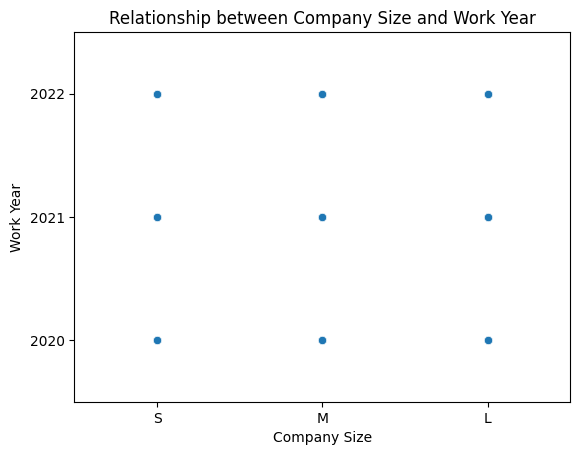

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping the category labels
company_size_labels = {0: 'S', 1: 'M', 2: 'L'}
work_year_labels = {2020: '2020', 2021: '2021', 2022: '2022'}

# Assuming we have our data stored in a pandas DataFrame called 'data'
sns.scatterplot(data=data, x='company_size', y='work_year')

# Set the x-axis label and tick labels
plt.xlabel('Company Size')
plt.xticks([0, 1, 2], ['S', 'M', 'L'])

# Set the y-axis label and tick labels
plt.ylabel('Work Year')
plt.yticks([2020, 2021, 2022], ['2020', '2021', '2022'])

# Set the title
plt.title('Relationship between Company Size and Work Year')

# Adjust the x-axis and y-axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(2019.5, 2022.5)

# Show the plot
plt.show()

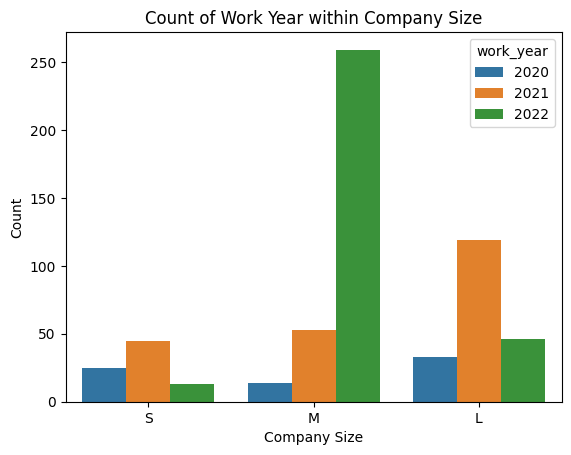

In [ ]:
#categorical bar plot
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming we have our data stored in a pandas DataFrame called 'data'
count_data = data.groupby(['company_size', 'work_year']).size().reset_index(name='count')

sns.barplot(data=count_data, x='company_size', y='count', hue='work_year')

# Set the x-axis label and tick labels
plt.xlabel('Company Size')
plt.xticks([0, 1, 2], ['S', 'M', 'L'])

# Set the y-axis label
plt.ylabel('Count')

# Set the title
plt.title('Count of Work Year within Company Size')

# Show the plot
plt.show()